In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
test=pd.read_csv('../data/imporved_model_clean_test_data_wout_dummy.csv')

In [3]:
price_predict=pd.read_csv('../data/ridgecv_predict_2.csv')

> add the predict price column into test dataframe

In [4]:
price_predict=price_predict.drop(['Id'],axis=1)

In [5]:
test=test.join(price_predict.astype(int))

In [6]:
test.columns

Index(['ms_subclass', 'lot_area', 'land_contour', 'lot_config', 'neighborhood',
       'bldg_type', 'house_style', 'overall_qual', 'year_remod_add',
       'roof_style', 'roof_matl', 'exterior_1st', 'exter_qual', 'mas_vnr_type',
       'mas_vnr_area', 'foundation', 'bsmt_qual', 'bsmtfin_type_1',
       'bsmtfin_sf_1', 'total_bsmt_sf', 'electrical', 'heating', 'central_air',
       'gr_liv_area', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'totrms_abvgrd', 'fireplaces', 'garage_type', 'garage_cars',
       'garage_area', 'mo_sold', 'yr_sold', 'gar_bsm_fir', 'saleprice'],
      dtype='object')

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ms_subclass     878 non-null    int64  
 1   lot_area        878 non-null    int64  
 2   land_contour    878 non-null    object 
 3   lot_config      878 non-null    object 
 4   neighborhood    878 non-null    object 
 5   bldg_type       878 non-null    object 
 6   house_style     878 non-null    object 
 7   overall_qual    878 non-null    int64  
 8   year_remod_add  878 non-null    int64  
 9   roof_style      878 non-null    object 
 10  roof_matl       878 non-null    object 
 11  exterior_1st    878 non-null    object 
 12  exter_qual      878 non-null    int64  
 13  mas_vnr_type    878 non-null    object 
 14  mas_vnr_area    878 non-null    float64
 15  foundation      878 non-null    object 
 16  bsmt_qual       878 non-null    int64  
 17  bsmtfin_type_1  878 non-null    int

### Now, I got the predicted price and all the other features that I used to predict the price, expect all the dummy columns, now I am going to do some EDA and try to find some insights 

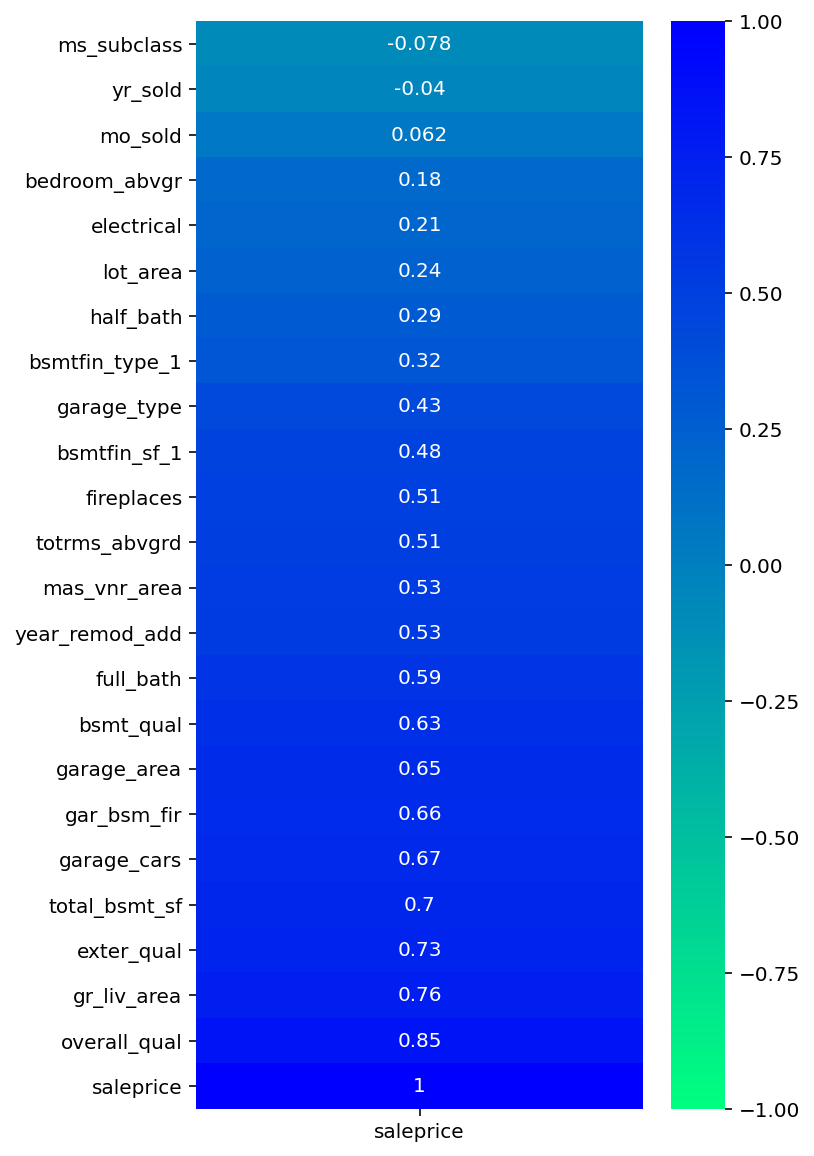

In [8]:
plt.figure(figsize=(5, 10))
corr=test.corr()[['saleprice']].sort_values(by='saleprice')
sns.heatmap(corr, annot=True, cmap="winter_r", vmin=-1, vmax=1);

In [9]:
test=test.sort_values(by=['neighborhood'])

#sort the dataframe by the neighborhood, easier to use in the chart later

`overall quality is the most positive correlation with saleprice`

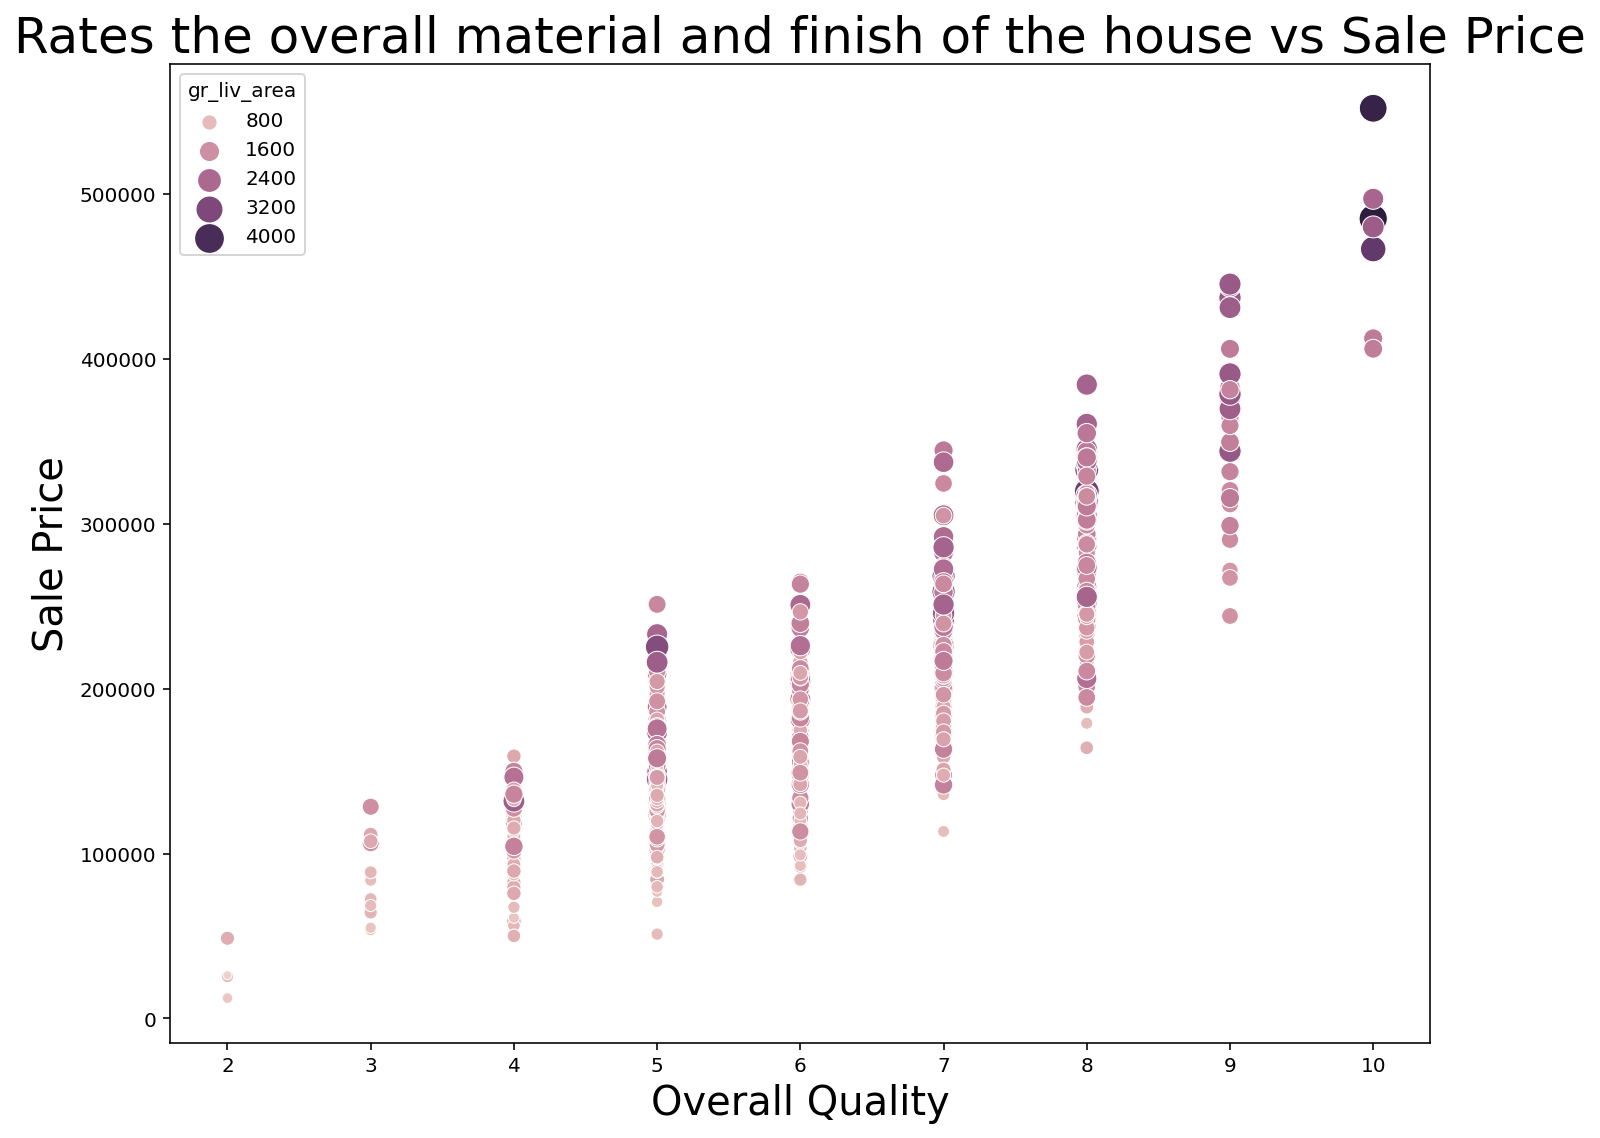

In [10]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=test, x='overall_qual',
                y='saleprice',hue='gr_liv_area',size='gr_liv_area',sizes=(20,200))

plt.xlabel("Overall Quality",size=20)
plt.ylabel("Sale Price",size=20)
plt.title('Rates the overall material and finish of the house vs Sale Price',size=25)
plt.tight_layout()
plt.savefig('../plots/overall-quality-vs-sale-price');

`In this chart, x-axis is the overall quality from low to high, and the y-axis is the sale price from low to high, and the dots are above ground living area of the houses.
It's kind of comman sense that the better overall quality the house has, the higher price it would be, same with the size of the house.`

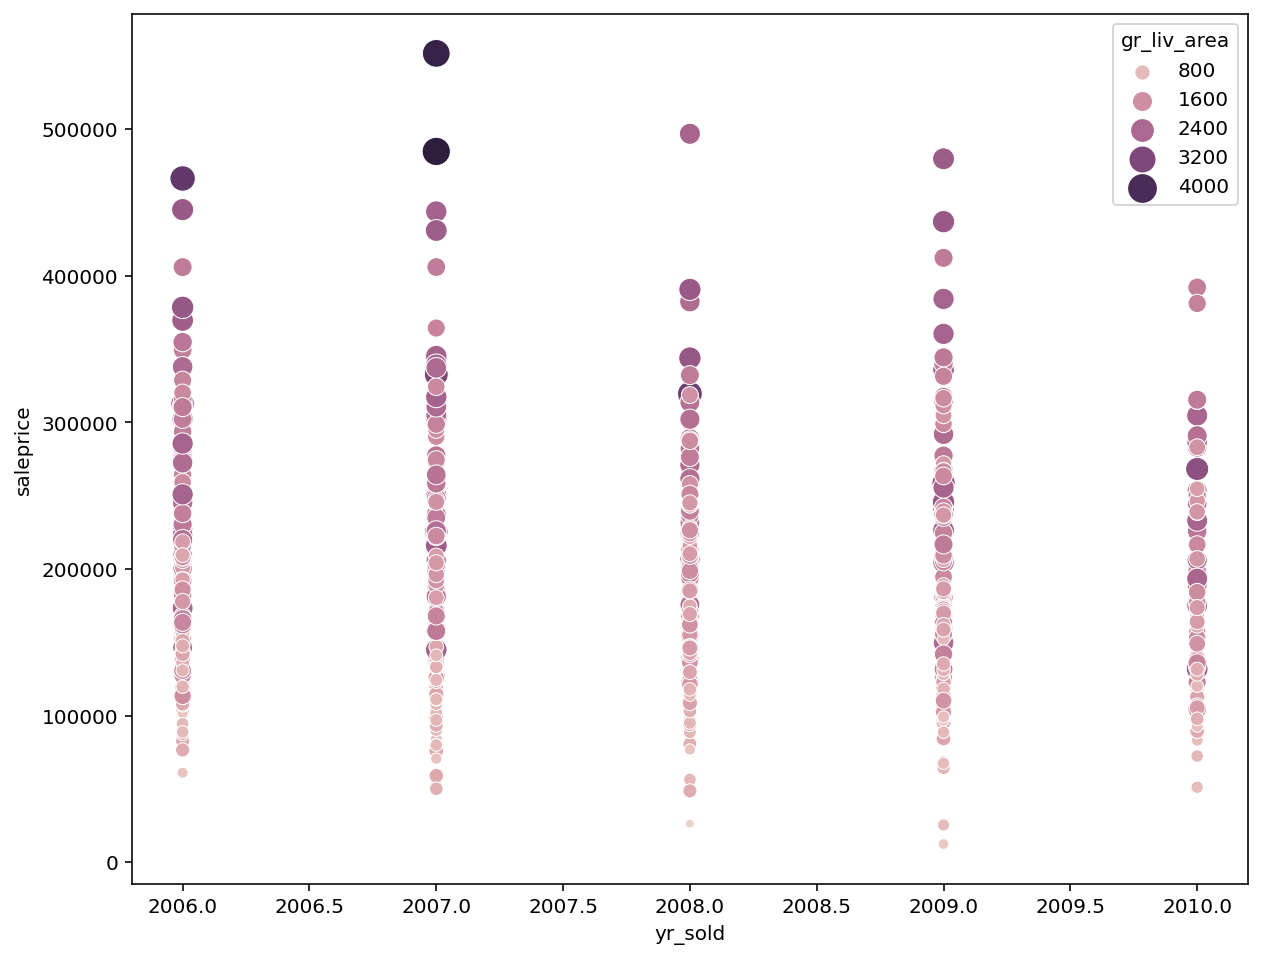

In [11]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=test, x='yr_sold',
                y='saleprice',hue='gr_liv_area',size='gr_liv_area',sizes=(20,200));

# plt.xlabel("Overall Quality",size=20)
# plt.ylabel("Sale Price",size=20)
# plt.title('Rates the overall material and finish of the house vs Sale Price',size=25);

`I couldn't tell much about this chart, when the x-axis is years that the houses been sold`

## I am going to separate all the sale price by neighborhood 

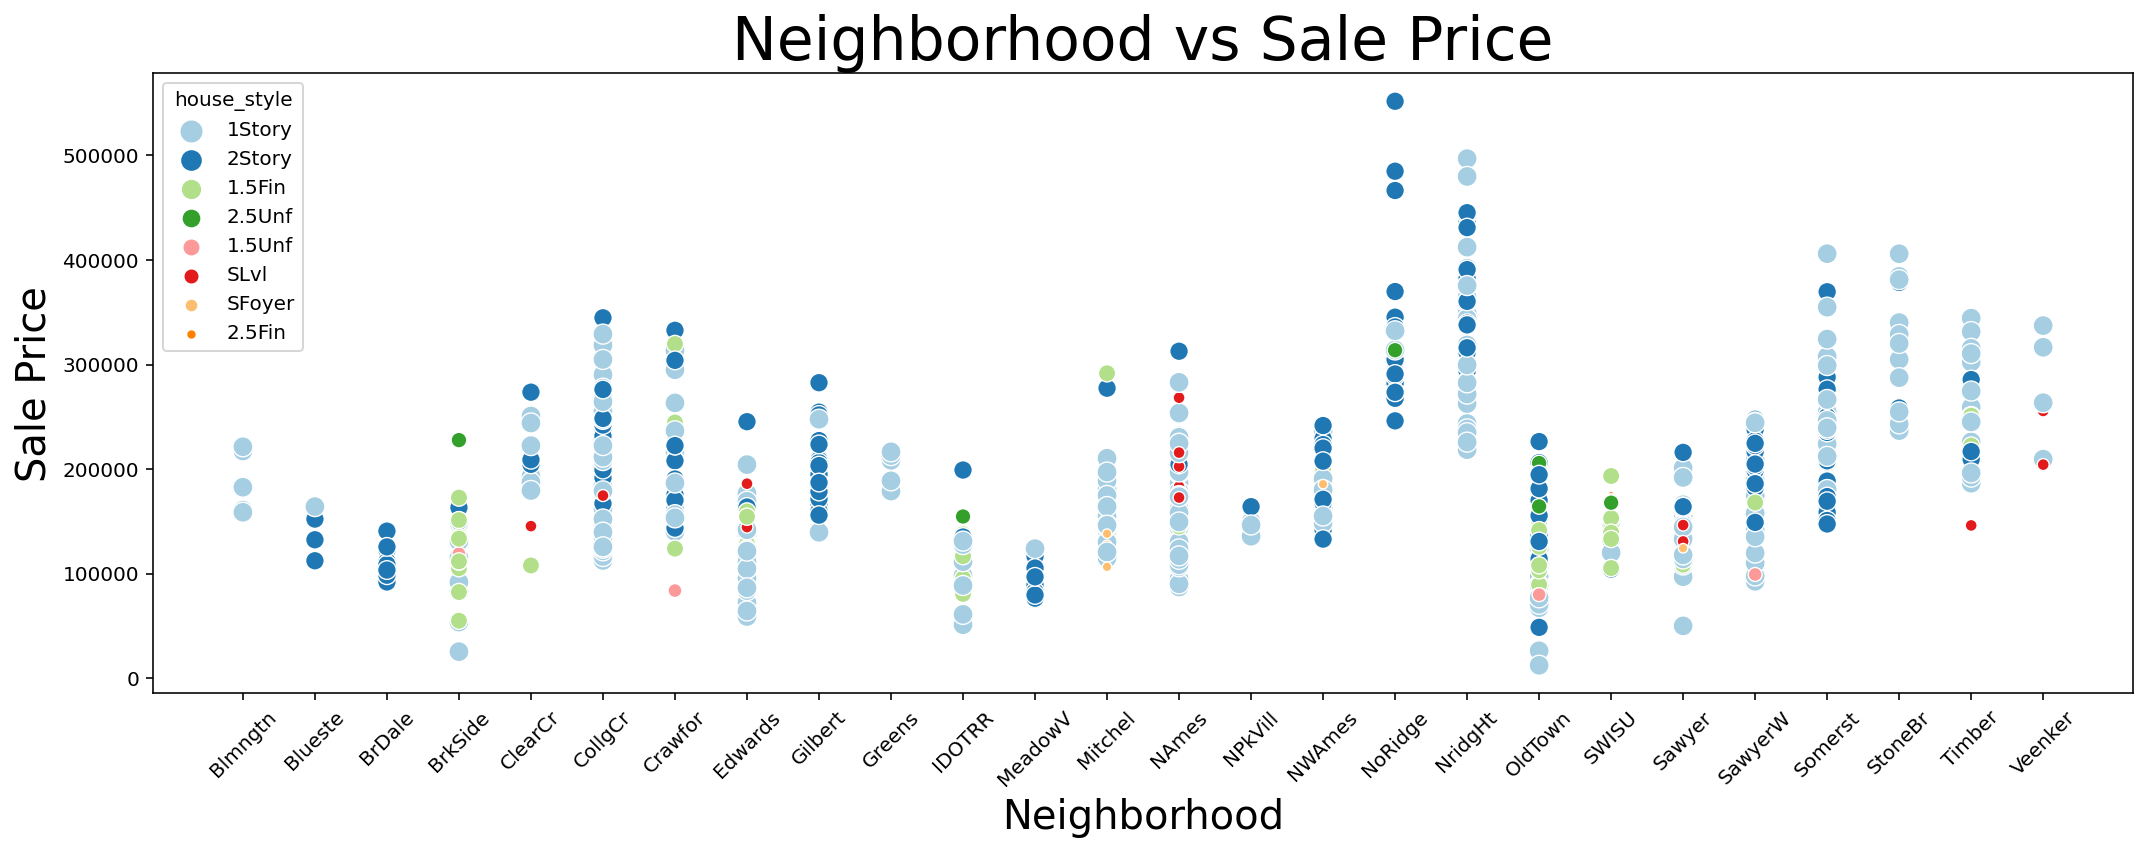

In [12]:
plt.figure(figsize=(15,6))
sns.set_palette('Paired')

sns.scatterplot(data=test, x='neighborhood',
                y='saleprice',hue='house_style',size='house_style',sizes=(10,100))

plt.xlabel("Neighborhood",size=20)
plt.ylabel("Sale Price",size=20)
plt.title('Neighborhood vs Sale Price',size=30)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/neighborhood-vs-sale-price');

`this is interesting that you can tell clearly the range of the price in different neighborhood and also the dots represent the house style, from one story to 2.5 story.`

In [13]:
test.neighborhood.unique()

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR', 'MeadowV',
       'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt',
       'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr',
       'Timber', 'Veenker'], dtype=object)

### I am getting some statistic data for different neighborhoods

In [14]:
nei_pri_df=test.groupby('neighborhood')['saleprice'].agg(['median','mean','max','min'])

In [15]:
nei_pri_df.head(1)

,median,mean,max,min
neighborhood,,,,
Blmngtn,171710.5,183197.0,221384,158355


In [16]:
nei_pri_df['median'].sort_values()

# MeadowV has the lowest median:98675
# then is BrDale: 110854
# StoneBr has the highest median: 320202
# then is NridgHt:316748

neighborhood
MeadowV     98675.0
BrDale     110854.0
IDOTRR     124764.0
BrkSide    126530.5
Edwards    128197.0
OldTown    130023.5
Sawyer     134579.5
SWISU      141441.0
Blueste    142304.5
NAmes      142468.0
NPkVill    147257.5
Mitchel    148298.5
Blmngtn    171710.5
NWAmes     172778.5
SawyerW    183140.0
Gilbert    187144.0
Crawfor    189634.5
ClearCr    195579.0
CollgCr    207671.0
Greens     208457.0
Somerst    238242.0
Timber     248396.5
Veenker    263510.0
NoRidge    304778.0
NridgHt    316748.0
StoneBr    320202.0
Name: median, dtype: float64

## Median

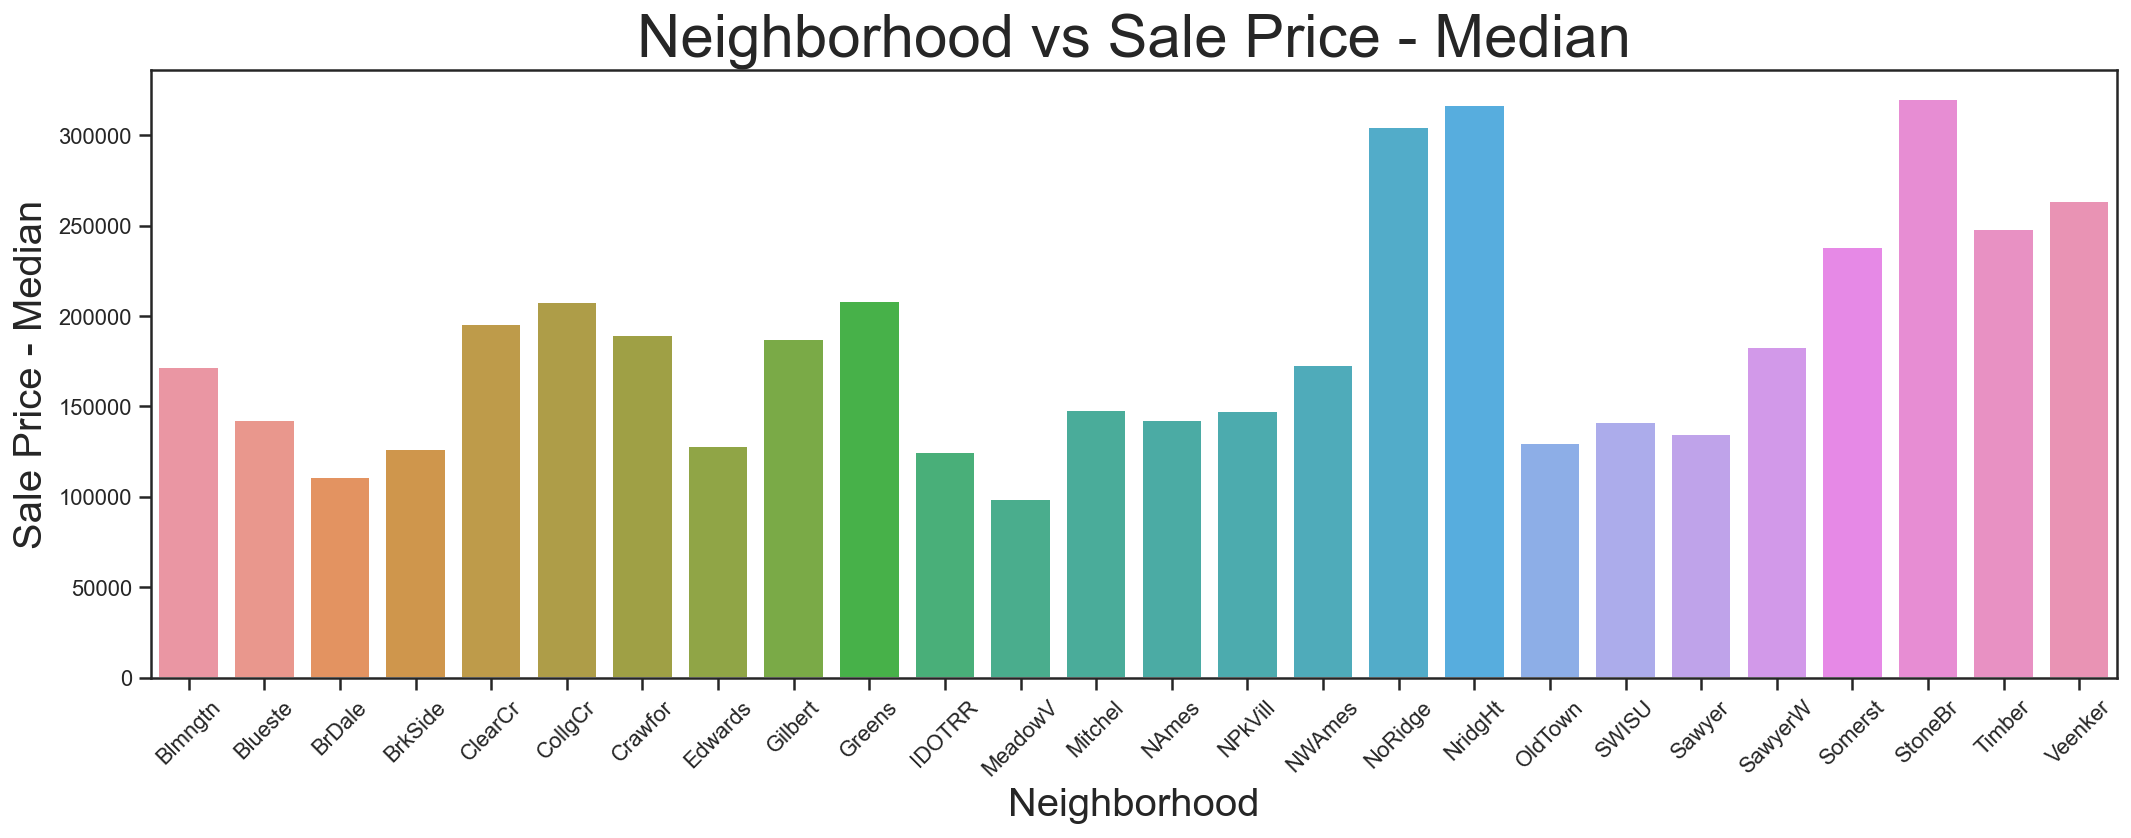

In [17]:
plt.figure(figsize=(15,6))

sns.set_theme(style="ticks")

sns.barplot(data=nei_pri_df,y=nei_pri_df['median'],x=nei_pri_df.index)
sns.cubehelix_palette(start=1, rot=-1, as_cmap=True)

plt.xlabel("Neighborhood",size=20)
plt.ylabel("Sale Price - Median",size=20)
plt.title('Neighborhood vs Sale Price - Median',size=30)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/neighborhood-vs-sale-price-median');

`NoRidge, NridgHt and StoneBr have the highest median sale price, which match my 'neighborhood vs sale price'chart above, NoRidge and NridgHt have some of the most expensive houses in town, but interesting enough seeing that StoneBr actually has the highest median among all the areas`

## Mean

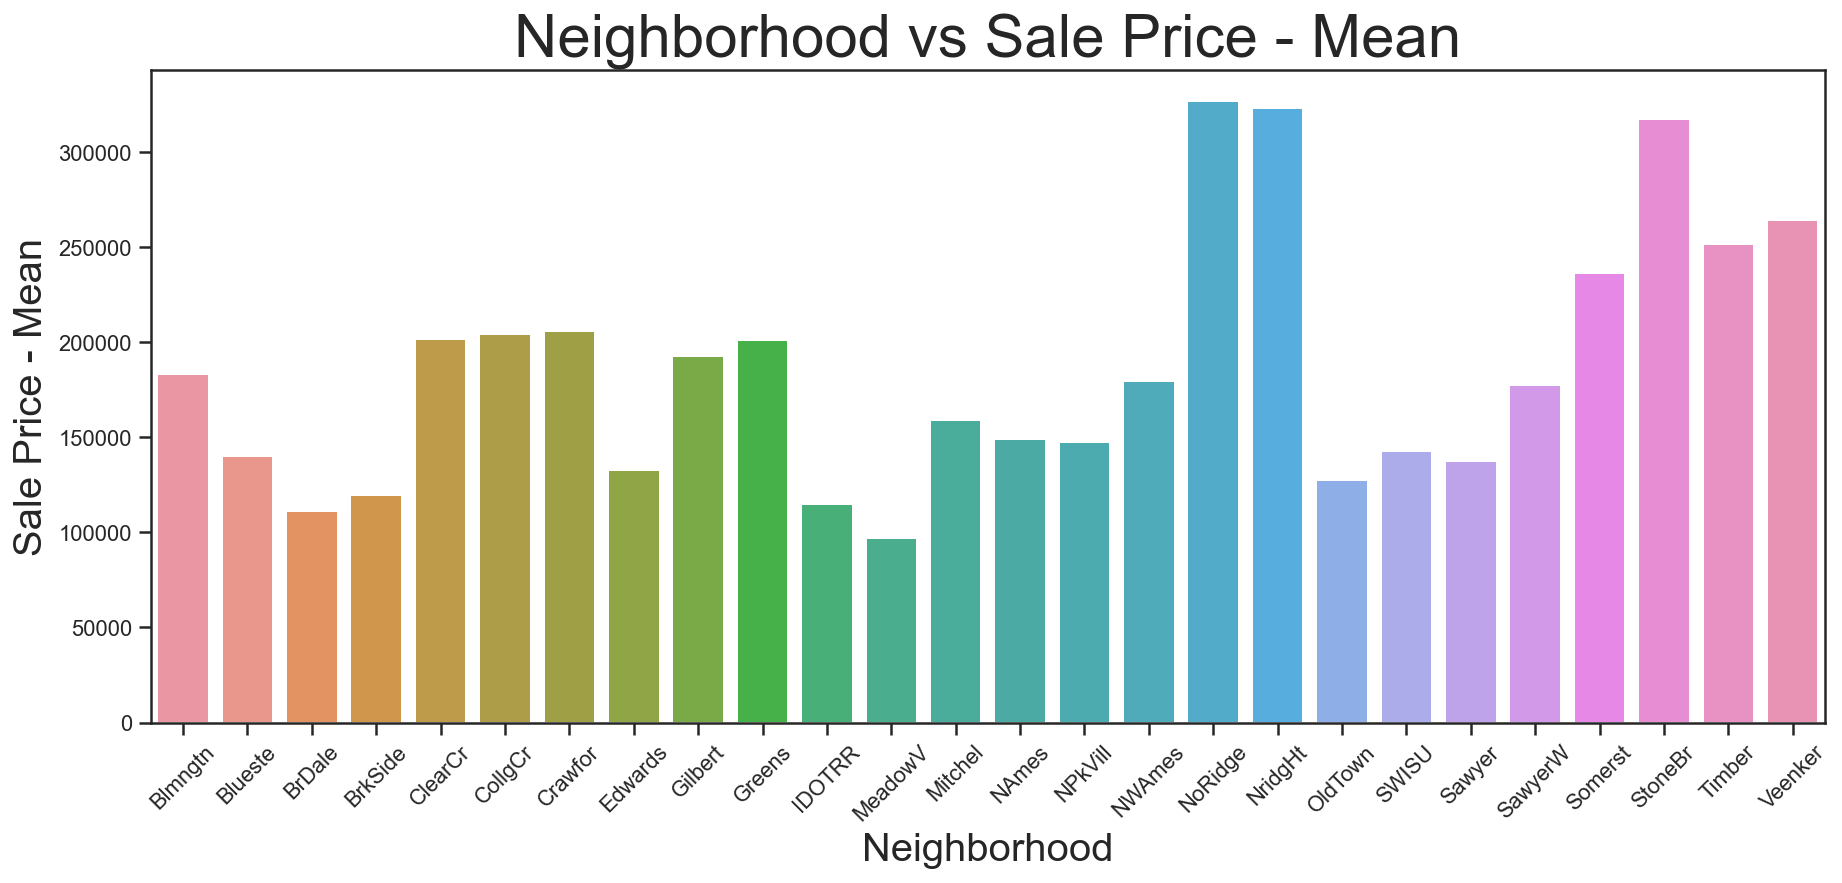

In [18]:
plt.figure(figsize=(15,6))

sns.set_theme(style="ticks")

sns.barplot(data=nei_pri_df,y=nei_pri_df['mean'],x=nei_pri_df.index)
sns.cubehelix_palette(start=1, rot=-1, as_cmap=True)

plt.xlabel("Neighborhood",size=20)
plt.ylabel("Sale Price - Mean",size=20)
plt.title('Neighborhood vs Sale Price - Mean',size=30)
plt.xticks(rotation=45);

## Max

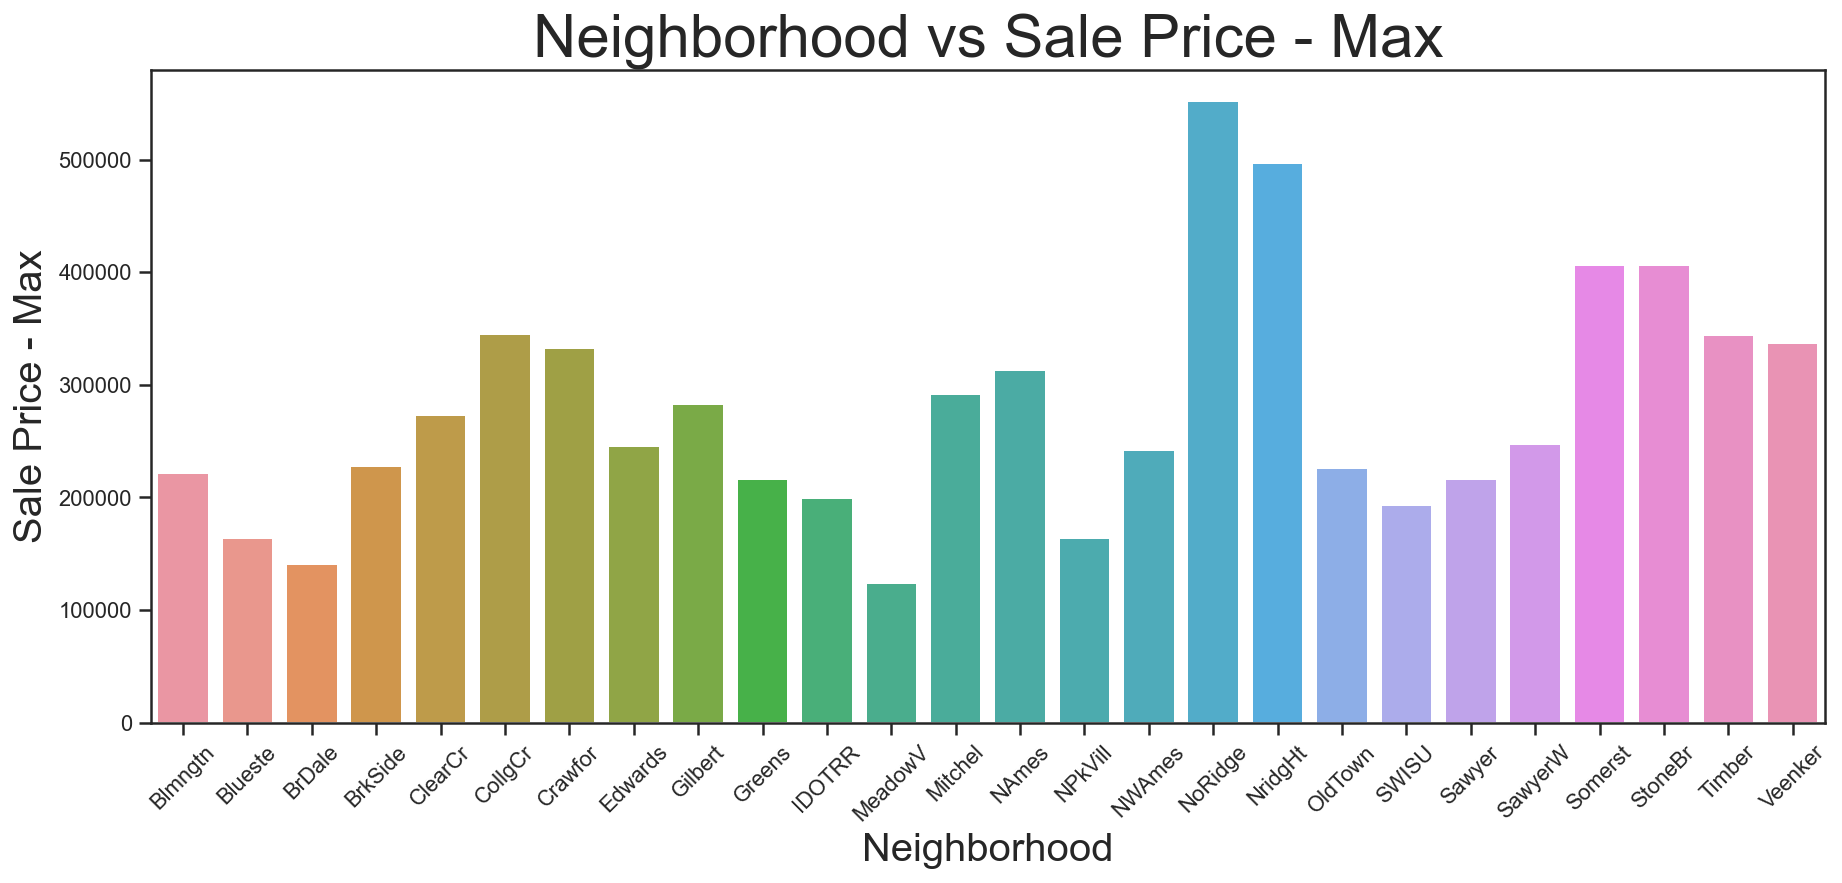

In [19]:
plt.figure(figsize=(15,6))

sns.set_theme(style="ticks")

sns.barplot(data=nei_pri_df,y=nei_pri_df['max'],x=nei_pri_df.index)
sns.cubehelix_palette(start=1, rot=-1, as_cmap=True)

plt.xlabel("Neighborhood",size=20)
plt.ylabel("Sale Price - Max",size=20)
plt.title('Neighborhood vs Sale Price - Max',size=30)
plt.xticks(rotation=45);

## Min

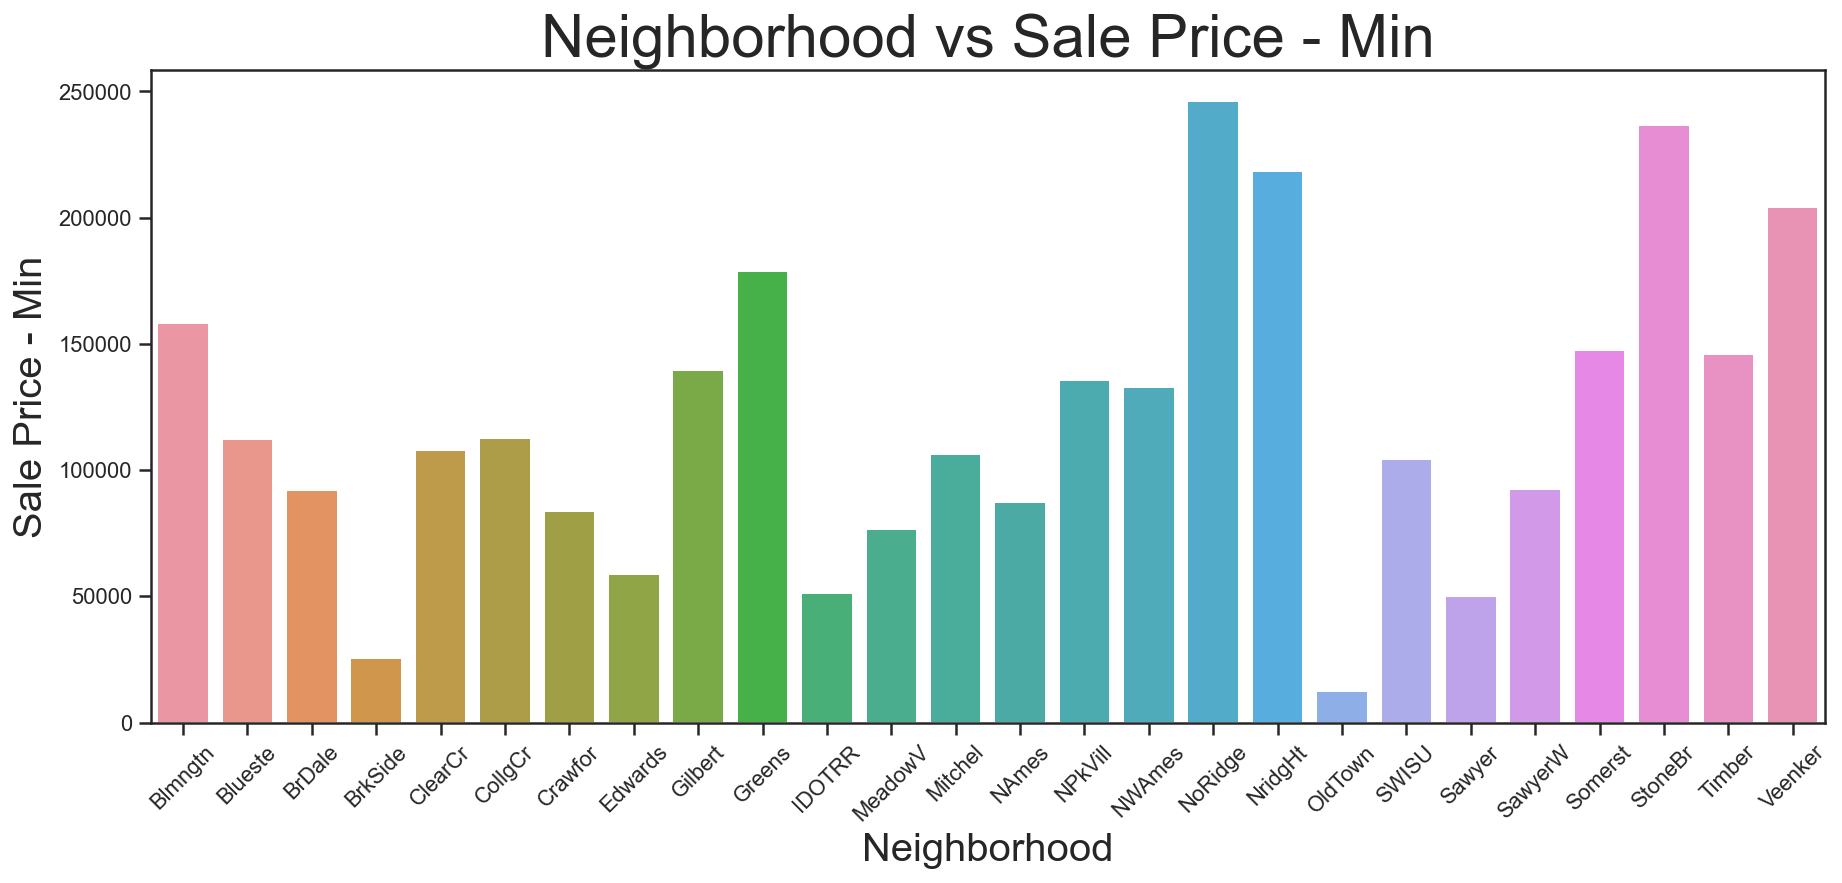

In [20]:
plt.figure(figsize=(15,6))

sns.set_theme(style="ticks")

sns.barplot(data=nei_pri_df,y=nei_pri_df['min'],x=nei_pri_df.index)
sns.cubehelix_palette(start=1, rot=-1, as_cmap=True)

plt.xlabel("Neighborhood",size=20)
plt.ylabel("Sale Price - Min",size=20)
plt.title('Neighborhood vs Sale Price - Min',size=30)
plt.xticks(rotation=45);

`BrkSide and OldTown have the lowest housing price`

## Now I want to see the sale prices change in the 4 years for MeadowV and StoneBr

I wanted to see if I can find anything interesting by graph year sold vs prices in different neighborhoods, but I didn't find much out from them.

## Rich: StoneBr and Nridght neighborhood

In [21]:
stonebr_nridght=test.loc[(test['neighborhood']=='StoneBr')|
                         (test['neighborhood']=='NridgHt'),['neighborhood','yr_sold','saleprice']]

In [22]:
stonebr_nridght_sta=stonebr_nridght.groupby(['yr_sold','neighborhood'])['saleprice'].agg(['median'])
stonebr_nridght_sta.reset_index()

,yr_sold,neighborhood,median
0,2006,NridgHt,327021.0
1,2006,StoneBr,353703.5
2,2007,NridgHt,304799.0
3,2007,StoneBr,258464.0
4,2008,NridgHt,350590.0
5,2008,StoneBr,265387.5
6,2009,NridgHt,330864.0
7,2009,StoneBr,322538.0
8,2010,NridgHt,299031.0
9,2010,StoneBr,318020.0


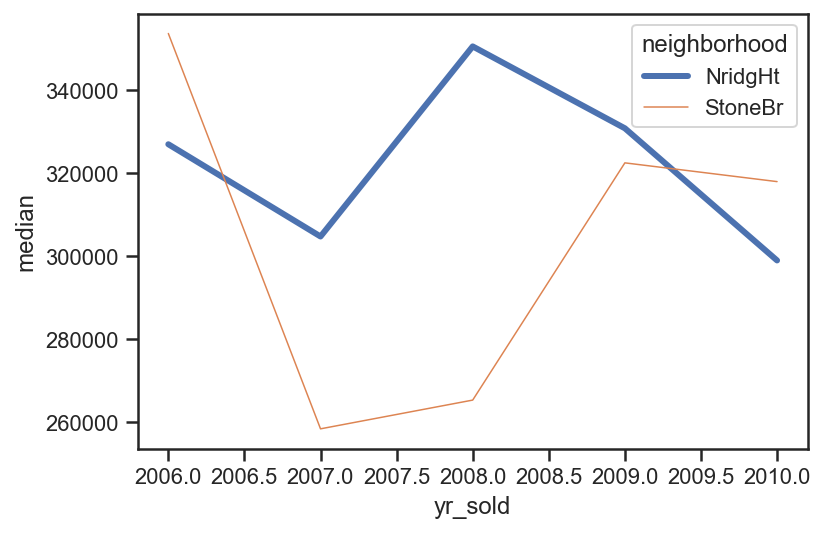

In [23]:
sns.lineplot(data=stonebr_nridght_sta, x='yr_sold', 
             y="median",markers=True,dashes=False,hue='neighborhood',size='neighborhood');

# median

## StoneBr neighborhood

In [24]:
stonebr=test.loc[(test['neighborhood']=='StoneBr'),['yr_sold','saleprice']]
stonebr_sta=stonebr.groupby('yr_sold')['saleprice'].agg(['median'])

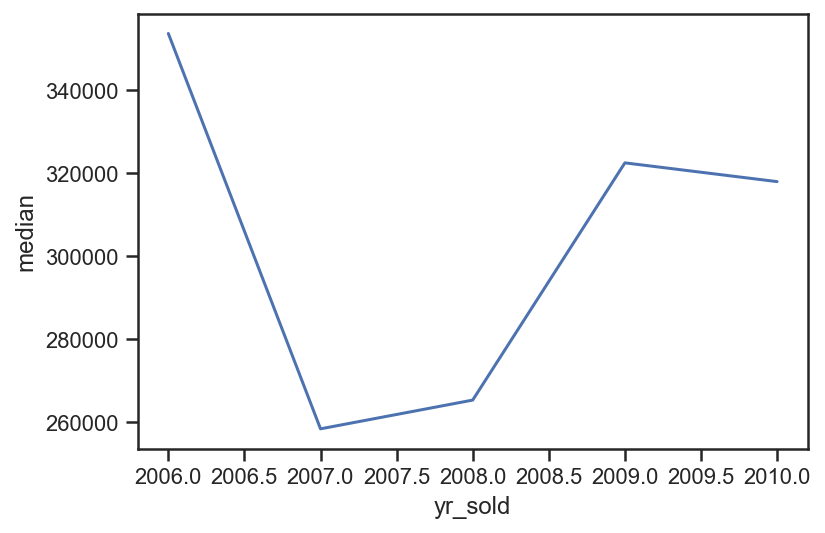

In [25]:
sns.lineplot(data=stonebr_sta, x=stonebr_sta.index, y="median",markers=True,dashes=False);

## Nridght neighborhood

In [26]:
nridght=test.loc[test['neighborhood']=='NridgHt',['yr_sold','saleprice']]
nridght_sta=nridght.groupby('yr_sold')['saleprice'].agg(['median'])

**financial crisis impact on this Nridght neighborhood more than the StoneBr**

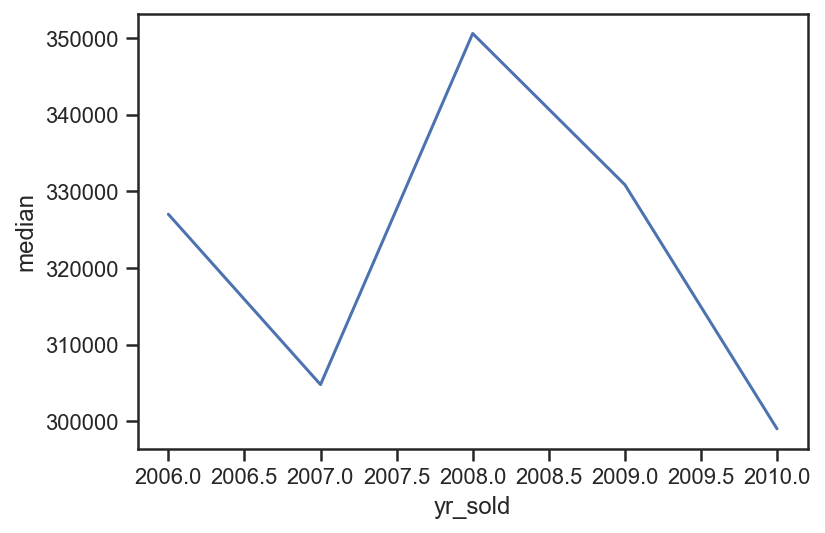

In [27]:
sns.lineplot(data=nridght_sta, x=nridght_sta.index, y="median",markers=True,dashes=False);

## Poor MeadowV and BrDale neighborhood

In [28]:
meadowv_brdale=test.loc[(test['neighborhood']=='MeadowV')|
                 (test['neighborhood']=='BrDale'),['yr_sold','saleprice','neighborhood']]
meadowv_brdale_sta=meadowv_brdale.groupby(['yr_sold','neighborhood'])['saleprice'].agg(['median'])

In [29]:
meadowv_brdale_sta.reset_index()

,yr_sold,neighborhood,median
0,2006,BrDale,107147.0
1,2006,MeadowV,92015.0
2,2007,BrDale,111688.0
3,2007,MeadowV,79601.0
4,2008,BrDale,108716.0
5,2009,BrDale,131556.5
6,2009,MeadowV,100469.0
7,2010,BrDale,95471.0
8,2010,MeadowV,96921.0


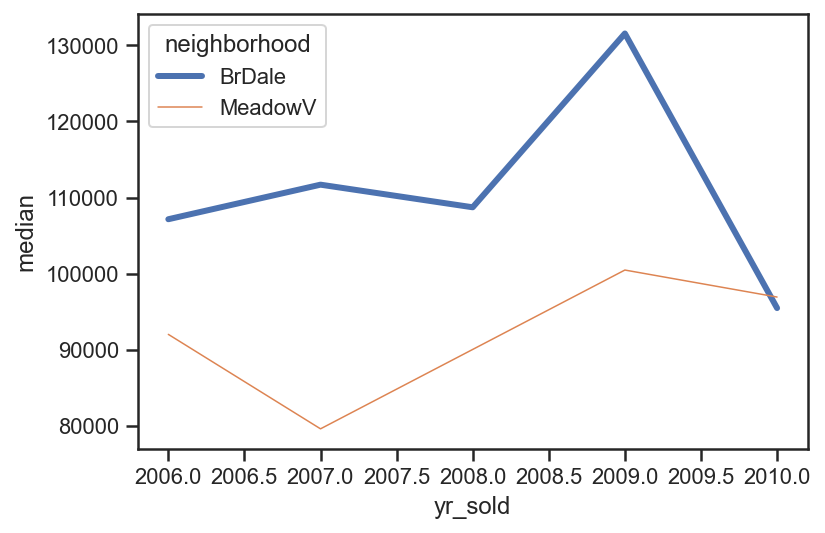

In [30]:
sns.lineplot(data=meadowv_brdale_sta, x='yr_sold', y="median",hue='neighborhood',size='neighborhood');

# flip house around 2008, people who has money, so the price increased in those two area

## MeadowV 

In [31]:
meadowv=test.loc[test['neighborhood']=='MeadowV',['yr_sold','saleprice']]
meadowv_sta=meadowv.groupby('yr_sold')['saleprice'].agg(['median'])

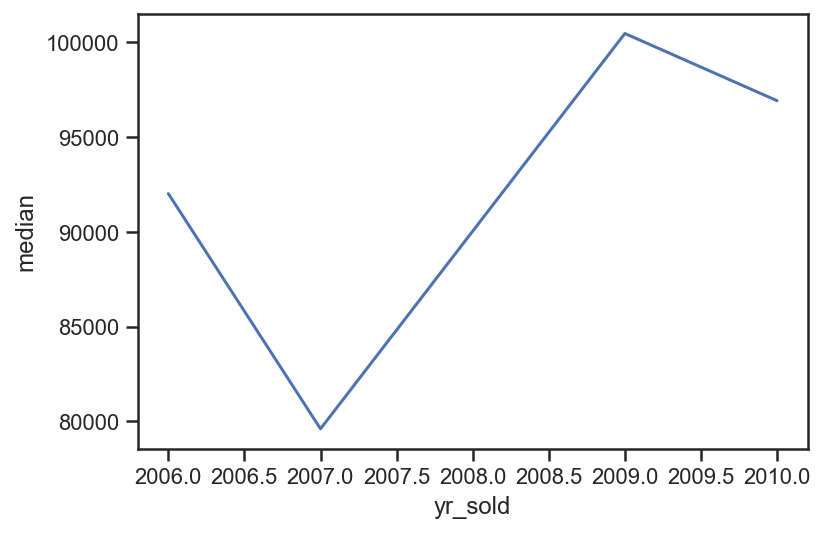

In [32]:
sns.lineplot(data=meadowv_sta, x=meadowv_sta.index, y="median");

## BrDale

In [33]:
brdale=test.loc[test['neighborhood']=='BrDale',['yr_sold','saleprice']]
brdale_sta=brdale.groupby('yr_sold')['saleprice'].agg(['median'])

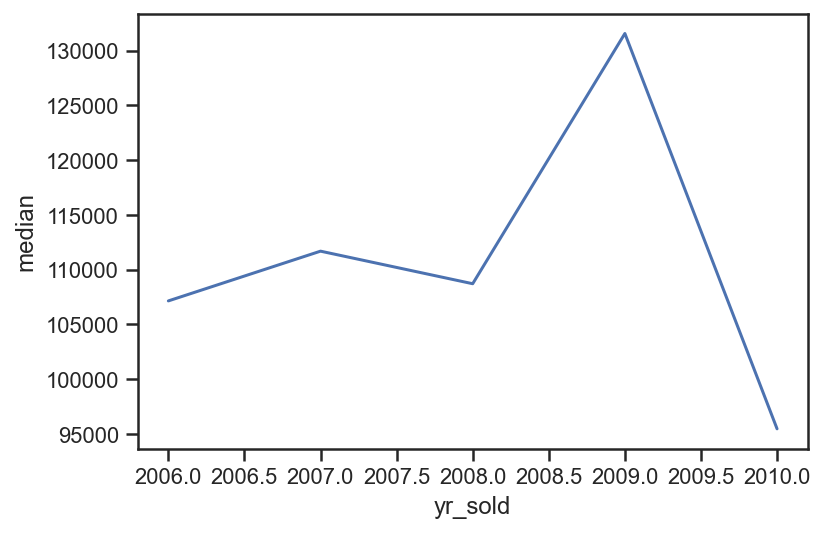

In [34]:
sns.lineplot(data=brdale_sta, x=brdale_sta.index, y="median");

## Neighborhood Old Town

In [35]:
oldtown=test.loc[test['neighborhood']=='OldTown',['yr_sold','saleprice']]
oldtown_sta=oldtown.groupby('yr_sold')['saleprice'].agg(['median'])

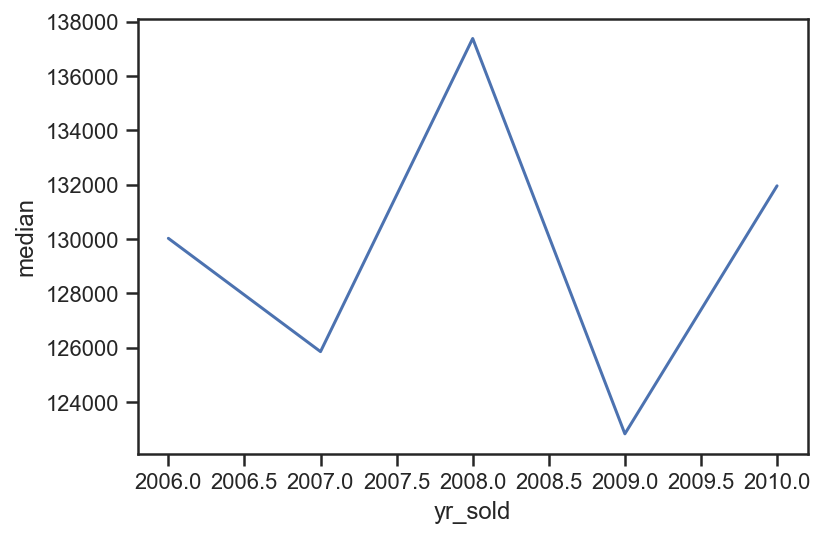

In [36]:
sns.lineplot(data=oldtown_sta, x=oldtown_sta.index, y="median");

## Neighborhood Brook Side

In [37]:
brkside=test.loc[test['neighborhood']=='BrkSide',['yr_sold','saleprice']]
brkside_sta=brkside.groupby('yr_sold')['saleprice'].agg(['median'])

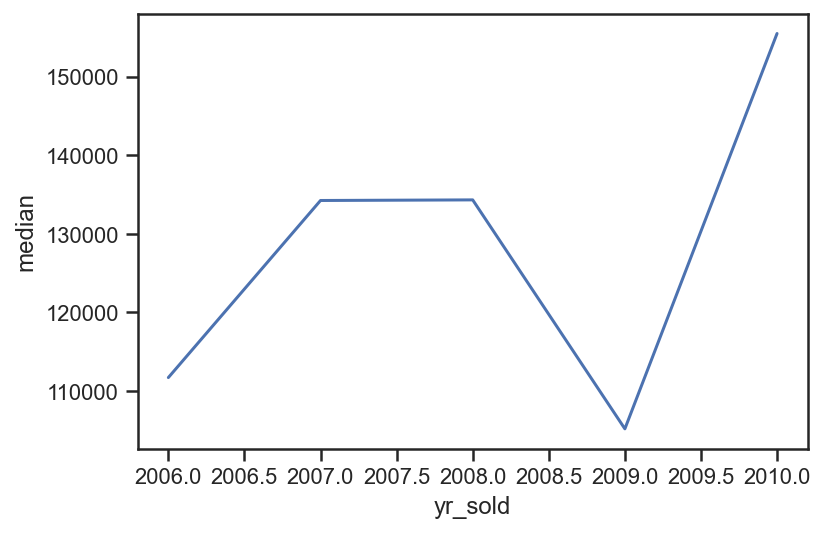

In [38]:
sns.lineplot(data=brkside_sta, x=brkside_sta.index, y="median");